# 2D->3D coordinate transformations
The following cell defines key geometric constants for the DUNE far detector wire planes

In [8]:
from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

theta_u = 0.623257100582
theta_v = -0.623257100582
theta_w = 0.

cos_u = np.cos(theta_u)
cos_v = np.cos(theta_v)
cos_w = np.cos(theta_w)
sin_u = np.sin(theta_u)
sin_v = np.sin(theta_v)
sin_w = np.sin(theta_w)

sin_dvu = np.sin(theta_v - theta_u)
sin_dwv = np.sin(theta_w - theta_v)
sin_duw = np.sin(theta_u - theta_w)

The following cell provides 6 functions that map 2D points from UV/UW/VW space into YZ plane of 3D world space (X being the same in wire plane and world spaces - subject to small variations in practise), and 3 functions that map from the YZ plane to the corresponding wire coordinates. Hopefully the names are self-explanatory, but please let us know if anything is unclear.

Given this is Python, if you find it convenient, you could always define uv_to_yz etc functions that return a pair of values y, z if you find it more convenient to have 3 functions for wire to 3D, rather than 6, and similarly you could write yz_to_uvw in a similar manner.

In [3]:
# wire to 3D
def uv_to_y(u, v):
    return ((u * cos_v - v * cos_u) / sin_dvu)

def uv_to_z(u, v):
    return ((u * sin_v - v * sin_u) / sin_dvu)

def uw_to_y(u, w):
    return ((w * cos_u - u * cos_w) / sin_duw)

def uw_to_z(u, w):
    return ((w * sin_u - u * sin_w) / sin_duw)

def vw_to_y(v, w):
    return ((v * cos_w - w * cos_v) / sin_dwv)

def vw_to_z(v, w):
    return ((v * sin_w - w * sin_v) / sin_dwv)

# 3D to wire
def yz_to_u(y, z):
    return z * cos_u - y * sin_u

def yz_to_v(y, z):
    return z * cos_v - y * sin_v

def yz_to_w(y, z):
    return z * cos_w - y * sin_w

In [4]:
random.seed(0)

print("Running...")


thr_std=0.2

E = Events("CheatedRecoFile_1.root")

view_u = View(E, "u")
view_v = View(E, "v")
view_w = View(E, "w")

u_x = view_u.x
u_z = view_u.z
u_adc = view_u.adc
u_truevtx_z = view_u.true_vtx_z
u_truevtx_x = view_u.true_vtx_x

v_x = view_v.x
v_z = view_v.z
v_adc = view_v.adc
v_truevtx_z = view_v.true_vtx_z
v_truevtx_x = view_v.true_vtx_x

w_x = view_w.x
w_z = view_w.z
w_adc = view_w.adc
w_truevtx_z = view_w.true_vtx_z
w_truevtx_x = view_w.true_vtx_x

Running...


In [26]:
def AoI(plane, event_number, thresholding=False, no_std=thr_std):
    if plane=="u":
        AoI_x = u_x[event_number]
        AoI_z = u_z[event_number]
        AoI_adc = u_adc[event_number]
        AoI_truevtxz = u_truevtx_z[event_number]
        AoI_truevtxx = u_truevtx_x[event_number]
    elif plane=="v":
        AoI_x = v_x[event_number]
        AoI_z = v_z[event_number]
        AoI_adc = v_adc[event_number]
        AoI_truevtxz = v_truevtx_z[event_number]
        AoI_truevtxx = v_truevtx_x[event_number]
    elif plane=="w":
        AoI_x = w_x[event_number]
        AoI_z = w_z[event_number]
        AoI_adc = w_adc[event_number]   
        AoI_truevtxz = w_truevtx_z[event_number]
        AoI_truevtxx = w_truevtx_x[event_number]
    else:
        print("PLane not u,v,w")
        
    if thresholding:
        mean = np.average(AoI_adc)
        std = np.std(AoI_adc)
        AoI_x = AoI_x[(mean-no_std*std<AoI_adc)]
        AoI_z = AoI_z[(mean-no_std*std<AoI_adc)]
        AoI_adc = AoI_adc[(mean-no_std*std<AoI_adc)]
    
    return AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx

def plotter(plane, event_number, thresholding=True, no_std=thr_std):
    
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, event_number, thresholding, no_std)
    print(len(AoI_x))
    print(len(AoI_z))

    plt.scatter(AoI_z, AoI_x, c=AoI_adc, cmap="viridis")
    plt.title(str(plane)+" plane")
    plt.xlabel("z")
    plt.ylabel("x")

    return 0


In [27]:
def uv_to_yz(u, v):
    return uv_to_y(u, v), uv_to_z(u, v)

def uw_to_yz(u, w):
    return uw_to_y(u, w), uw_to_z(u, w)

def vw_to_yz(v, w):
    return vw_to_y(v, w), vw_to_z(v, w)


In [38]:
AoI_xu, AoI_zu, AoI_adc, AoI_truevtxz, AoI_truevtxxu = AoI("u", 12, thresholding=False)
AoI_xu.sort()
#print(AoI_xu)
print(len(AoI_xu))
AoI_xv, AoI_zv, AoI_adc, AoI_truevtxz, AoI_truevtxxv = AoI("v", 12, thresholding=False)
AoI_xv.sort()
#print(AoI_xv)
print(len(AoI_xv))
AoI_xw, AoI_zw, AoI_adc, AoI_truevtxz, AoI_truevtxxw = AoI("w", 12, thresholding=False)
AoI_xw.sort()
#print(AoI_xw)
print(len(AoI_xw))

5749
6520
7072


In [32]:
def convert_event_to_xyz(event_number):
    AoI_x, AoI_zu, AoI_adc, AoI_truevtxz, AoI_truevtxxu = AoI("u", event_number, thresholding=False)
    AoI_x, AoI_zv, AoI_adc, AoI_truevtxz, AoI_truevtxxv = AoI("v", event_number, thresholding=False)
    AoI_x, AoI_zw, AoI_adc, AoI_truevtxz, AoI_truevtxxw = AoI("w", event_number, thresholding=False)
    
    y, z = uv_to_yz(AoI_zu, AoI_zv)
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
 
    # Creating plot
    ax.scatter3D(AoI_x, y, z, color = "green")
    plt.title("simple 3D scatter plot")
    # show plot
    plt.show()
    return 0

In [33]:
convert_event_to_xyz(10)

ValueError: operands could not be broadcast together with shapes (932,) (1200,) 

2351
2351


0

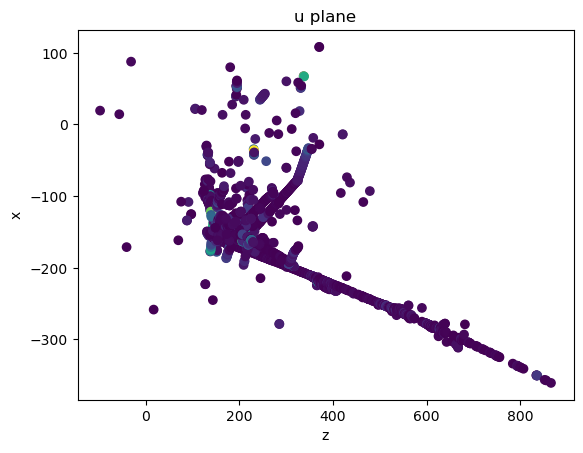

In [23]:
plotter("u", 12)

3100
3100


0

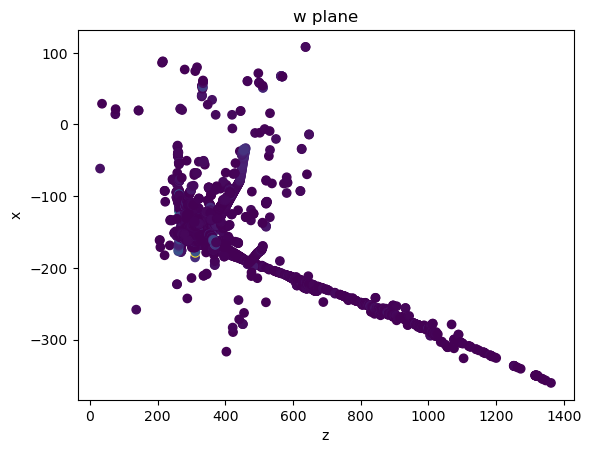

In [24]:
plotter("w", 12)

2772
2772


0

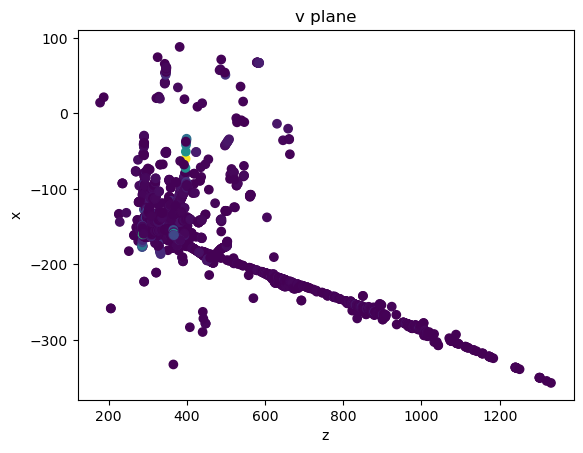

In [25]:
plotter("v", 12)